# **Objectives:**
- Design and implement a CNN for image classification
- Develop an image captioning model using Encoder-Decoder with LSTM
- Select appropriate loss functions and optimizers for both models
- Train the models while implementing checkpoints to save progress
- Visualize training and validation metrics for model assessment
- Save the trained models for evaluation in the next notebook

# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Deep Learning/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Deep-Learning-Classification-Captions.git

import sys
sys.path.append('/content/Deep-Learning-Classification-Captions.git/utils')
%cd /content/Deep-Learning-Classification-Captions/utils
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Deep-Learning-Classification-Captions'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 49 (delta 19), reused 35 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 211.93 KiB | 26.49 MiB/s, done.
Resolving deltas: 100% (19/19), done.
/content/Deep-Learning-Classification-Captions/utils
/content/Deep-Learning-Classification-Captions/utils
utils.py


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Load Data

In [3]:
PROCESSED_PATH = '/content/drive/My Drive/Professional/Portfolio/Deep Learning/Data/'
X_train = np.load(os.path.join(PROCESSED_PATH, 'X_train.npy'))
X_test = np.load(os.path.join(PROCESSED_PATH, 'X_test.npy'))
y_train = np.load(os.path.join(PROCESSED_PATH, 'y_train.npy'))
y_test = np.load(os.path.join(PROCESSED_PATH, 'y_test.npy'))
print("Data loading complete.")

Data loading complete.


# Initial Modeling

## Functions

In [ ]:
def build_model(input_shape, num_classes):
    """
    Builds a Convolutional Neural Network (CNN) for image classification.
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    """
    Train the CNN model using training and validation data.
    """
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size
    )
    return history

In [ ]:
def plot_training_history(history):
    """
    Visualize model accuracy and loss during training.
    """
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

## Execution

## Take 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.4647 - loss: 1.2169 - val_accuracy: 0.5429 - val_loss: 0.6907
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.5772 - loss: 0.6875 - val_accuracy: 0.5857 - val_loss: 0.6782
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.6760 - loss: 0.6556 - val_accuracy: 0.6429 - val_loss: 0.6693
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6789 - loss: 0.6138 - val_accuracy: 0.5429 - val_loss: 0.6267
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.7252 - loss: 0.6378 - val_accuracy: 0.5286 - val_loss: 0.6353
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8037 - loss: 0.4896 - val_accuracy: 0.7571 - val_loss: 0.5202
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8397 - loss: 0.3386 - val_accuracy: 0.7143 - val_loss: 0.5042
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8754 - loss: 0.3166 - val_accuracy: 0.7429 - val_loss: 0.4946
Epoch 9/

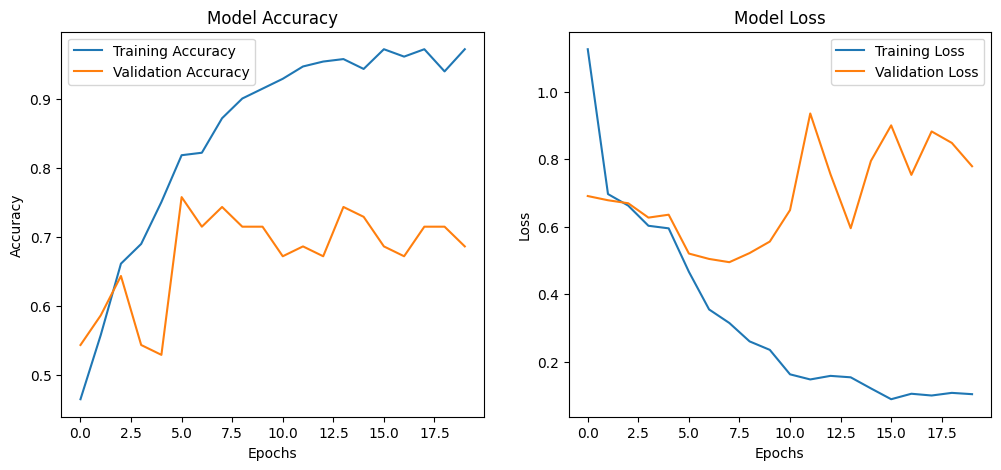

In [ ]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32)

plot_training_history(history)


In [ ]:
model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_1.keras')

## Take 2

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.5103 - loss: 2.3912 - val_accuracy: 0.4714 - val_loss: 0.9397 - learning_rate: 0.0010
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.5622 - loss: 0.9381 - val_accuracy: 0.5714 - val_loss: 0.9271 - learning_rate: 0.0010
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6127 - loss: 0.9073 - val_accuracy: 0.6000 - val_loss: 0.8919 - learning_rate: 0.0010
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6752 - loss: 0.8662 - val_accuracy: 0.5857 - val_loss: 0.8786 - learning_rate: 0.0010
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.6258 - loss: 0.8459 - val_accuracy: 0.5857 - val_loss: 0.8359 - learning_rate: 0.0010
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.6905 - loss: 0.7869 - val_accuracy: 0.6429 - val_loss: 0.8002 - learning_rate: 0.0010
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7314 - loss: 0.7186 - val_accuracy: 0.6429 - val_l

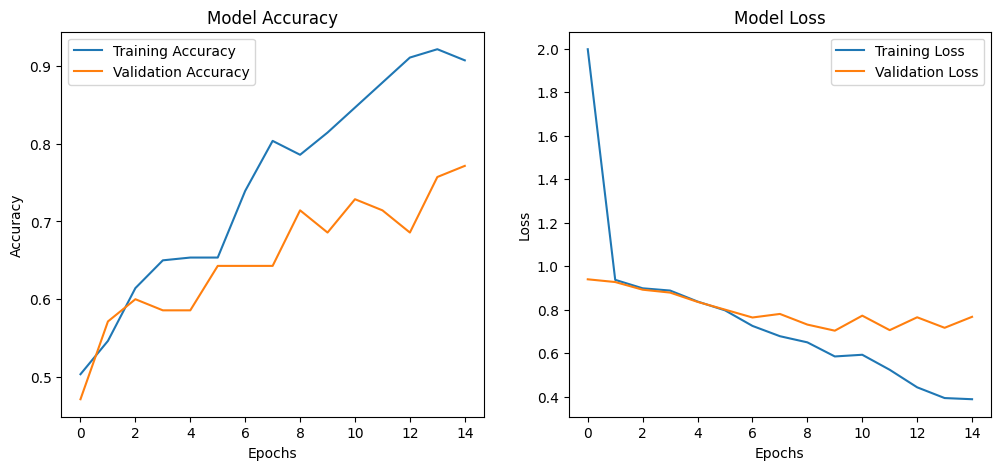

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.6),  # Increased Dropout Rate
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, lr_scheduler]  # Added Callbacks
    )
    return history

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32)

plot_training_history(history)

In [ ]:
model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_2.keras')

## Take 3 - Winner

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.4799 - loss: 2.6835 - val_accuracy: 0.5286 - val_loss: 0.9409 - learning_rate: 0.0010
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.5612 - loss: 0.9407 - val_accuracy: 0.5000 - val_loss: 0.9385 - learning_rate: 0.0010
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.5352 - loss: 0.9278 - val_accuracy: 0.6143 - val_loss: 0.9145 - learning_rate: 0.0010
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.6292 - loss: 0.8980 - val_accuracy: 0.4857 - val_loss: 0.9278 - learning_rate: 0.0010
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.6344 - loss: 0.8595 - val_accuracy: 0.5429 - val_loss: 0.8969 - learning_rate: 0.0010
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.6848 - loss: 0.8272 - val_accuracy: 0.6000 - val_loss: 0.8803 - learning_rate: 0.0010
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.7768 - loss: 0.7705 - val_accuracy: 0.6143 - val_l

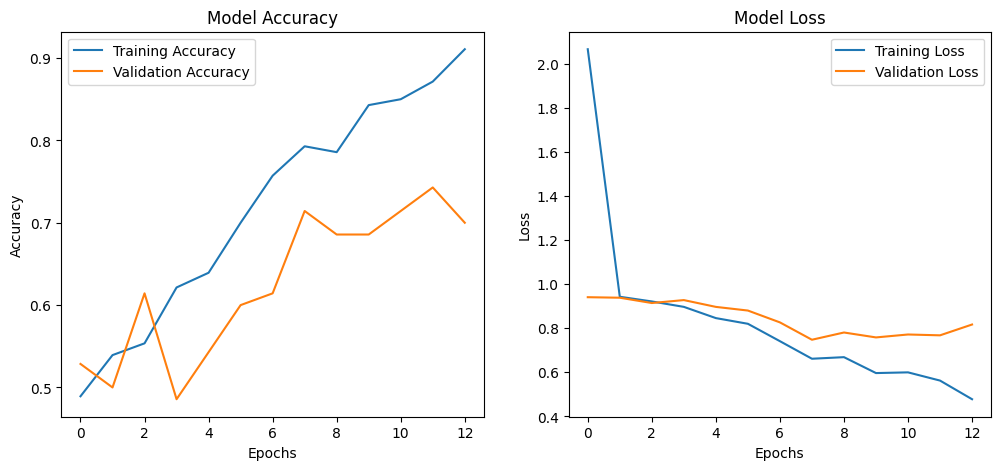

In [ ]:
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.6),  # Increased Dropout Rate
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, lr_scheduler]  # Added Callbacks
    )
    return history

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32)

plot_training_history(history)
model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_3.keras')

## Take 4

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 87s 9s/step - accuracy: 0.5269 - loss: 5.8875 - val_accuracy: 0.5143 - val_loss: 3.0728 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.5895 - loss: 7.0120 - val_accuracy: 0.4714 - val_loss: 2.3123 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.4920 - loss: 9.7794 - val_accuracy: 0.4429 - val_loss: 2.3451 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 0.5466 - loss: 7.6293 - val_accuracy: 0.5286 - val_loss: 2.2020 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.5082 - loss: 6.9817 - val_accuracy: 0.4857 - val_loss: 2.7484 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.4816 - loss: 7.4502 - val_accuracy: 0.5143 - val_loss: 3.1370 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.5459 - loss: 7.3043 - val_accuracy: 0.4857 - val_l

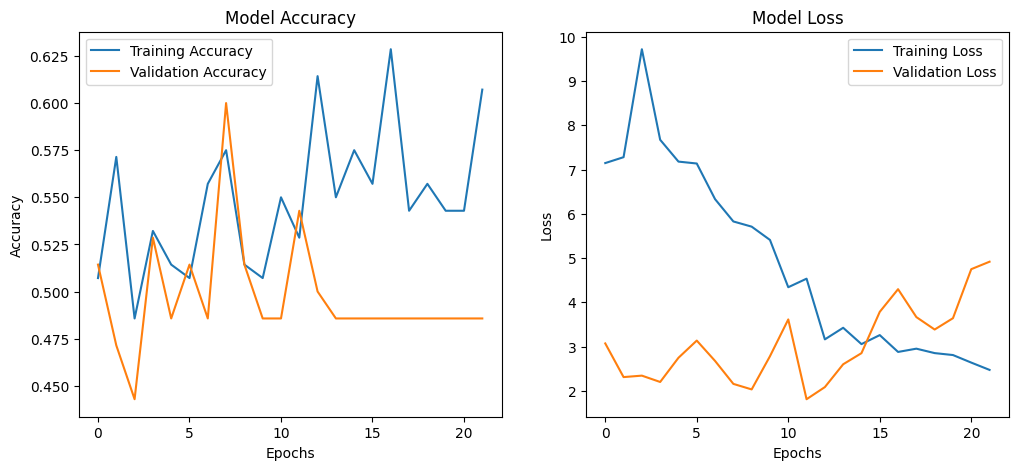

Model saved successfully.


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.4),  # Balanced Dropout Rate

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Slightly increased learning rate
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=30, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),  # Using augmented data
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[early_stopping, lr_scheduler]  # Enhanced Callbacks
    )
    return history

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

plot_training_history(history)

model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_4.keras')
print(f"Model saved successfully.")

## Take 5

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 16s/step - accuracy: 0.5057 - loss: 3.0246 - val_accuracy: 0.5000 - val_loss: 1.0474 - learning_rate: 3.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 70s 14s/step - accuracy: 0.5992 - loss: 3.1615 - val_accuracy: 0.4857 - val_loss: 1.1167 - learning_rate: 3.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 13s/step - accuracy: 0.5346 - loss: 3.1607 - val_accuracy: 0.4714 - val_loss: 1.1585 - learning_rate: 3.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 13s/step - accuracy: 0.5717 - loss: 3.5141 - val_accuracy: 0.4857 - val_loss: 1.2226 - learning_rate: 3.0000e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 82s 15s/step - accuracy: 0.6127 - loss: 2.5409 - val_accuracy: 0.4857 - val_loss: 1.5704 - learning_rate: 1.5000e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 69s 16s/step - accuracy: 0.5963 - loss: 2.0624 - val_accuracy: 0.4857 - val_loss: 1.9759 - learning_rate: 1.5000e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 13s/step - accuracy: 0.6246 - loss: 1.9073

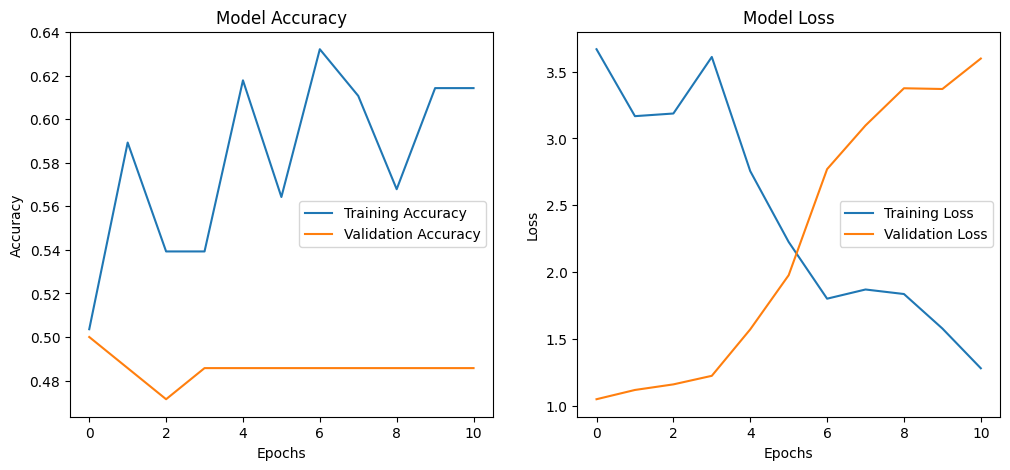

Model saved successfully.


In [ ]:
# Data Augmentation (Simplified)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003, clipnorm=1.0),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=30, batch_size=64):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=64)

plot_training_history(history)
model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_5.keras')
print(f"Model saved successfully.")

## Take 6

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 85s 15s/step - accuracy: 0.5079 - loss: 2.0203 - val_accuracy: 0.4857 - val_loss: 1.0284 - learning_rate: 3.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 67s 12s/step - accuracy: 0.4020 - loss: 3.5173 - val_accuracy: 0.4857 - val_loss: 1.0440 - learning_rate: 3.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 67s 15s/step - accuracy: 0.5482 - loss: 2.4762 - val_accuracy: 0.5143 - val_loss: 1.0935 - learning_rate: 3.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 12s/step - accuracy: 0.5965 - loss: 2.4806 - val_accuracy: 0.4429 - val_loss: 1.1853 - learning_rate: 3.0000e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 64s 12s/step - accuracy: 0.5603 - loss: 2.2432 - val_accuracy: 0.4857 - val_loss: 1.3549 - learning_rate: 3.0000e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 12s/step - accuracy: 0.5663 - loss: 1.9864 - val_accuracy: 0.4857 - val_loss: 1.4552 - learning_rate: 3.0000e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 69s 13s/step - accuracy: 0.4744 - loss: 2.3101

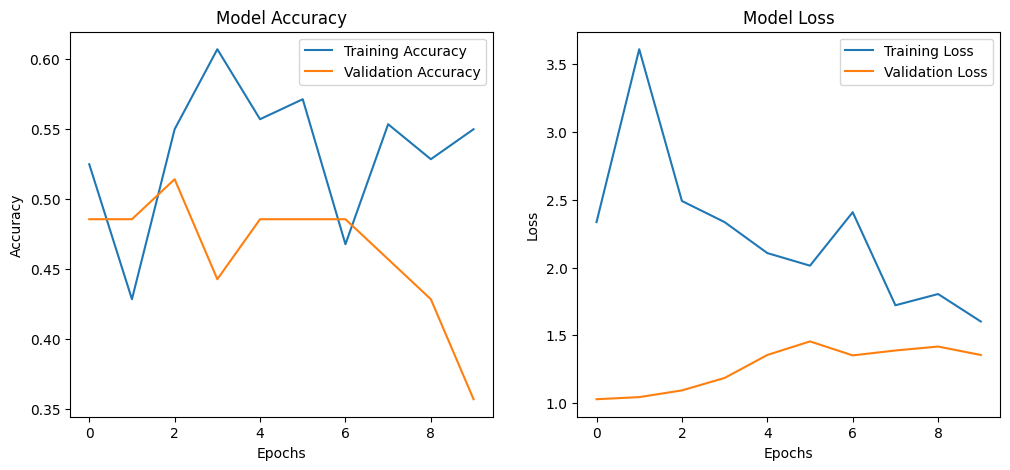

Model saved successfully.


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

def build_model(input_shape, num_classes):
    """
    Builds an improved Convolutional Neural Network (CNN) for better stability and accuracy.
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(96, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003, clipnorm=1.0),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=30, batch_size=64):
    """
    Train the enhanced CNN model using training and validation data.
    """
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    early_stopping_acc = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[early_stopping, early_stopping_acc, lr_scheduler]
    )
    return history

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=64)

plot_training_history(history)

model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_6.keras')
print(f"Model saved successfully.")

## Take 7

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - accuracy: 0.4828 - loss: 1.3523 - val_accuracy: 0.4571 - val_loss: 0.8912 - learning_rate: 1.0000e-04
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.5813 - loss: 1.2329 - val_accuracy: 0.4857 - val_loss: 0.8997 - learning_rate: 1.0000e-04
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.5465 - loss: 1.4143 - val_accuracy: 0.4857 - val_loss: 0.9560 - learning_rate: 1.0000e-04
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.4954 - loss: 1.1515 - val_accuracy: 0.4857 - val_loss: 1.1169 - learning_rate: 1.0000e-04
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.6234 - loss: 0.9541 - val_accuracy: 0.4857 - val_loss: 1.4241 - learning_rate: 1.0000e-04
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.5644 - loss: 0.9859 - val_accuracy: 0.4857 - val_loss: 1.5774 - learning_rate: 1.0000e-04


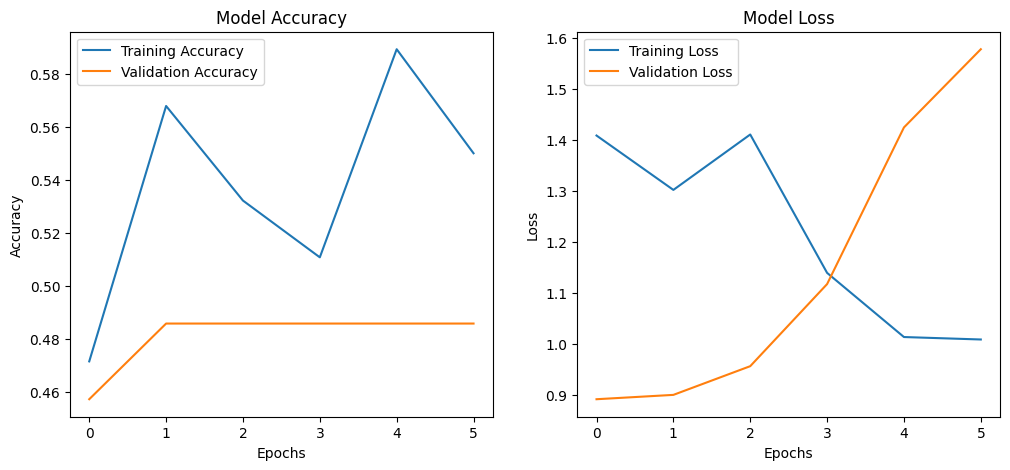

Model saved successfully.


In [ ]:
# Refined Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

def build_model(input_shape, num_classes):
    """
    Builds an improved Convolutional Neural Network (CNN) for better stability and accuracy.
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.4),

        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


def train_model(model, X_train, y_train, X_val, y_val, epochs=30, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    early_stopping_acc = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[early_stopping, early_stopping_acc, lr_scheduler]
    )
    return history

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

plot_training_history(history)

model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_7.keras')
print(f"Model saved successfully.")

## Take 3.1

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.4464 - loss: 1.2716 - val_accuracy: 0.5857 - val_loss: 0.9135 - learning_rate: 0.0010
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.5828 - loss: 0.9056 - val_accuracy: 0.6286 - val_loss: 0.9019 - learning_rate: 0.0010
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6226 - loss: 0.8969 - val_accuracy: 0.5000 - val_loss: 0.8829 - learning_rate: 0.0010
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5819 - loss: 0.8654 - val_accuracy: 0.5286 - val_loss: 0.8468 - learning_rate: 0.0010
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6343 - loss: 0.8227 - val_accuracy: 0.6000 - val_loss: 0.8059 - learning_rate: 0.0010
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.7243 - loss: 0.7626 - val_accuracy: 0.6857 - val_loss: 0.7653 - learning_rate: 0.0010
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.7398 - loss: 0.7106 - val_accuracy: 0.6571 - val_l

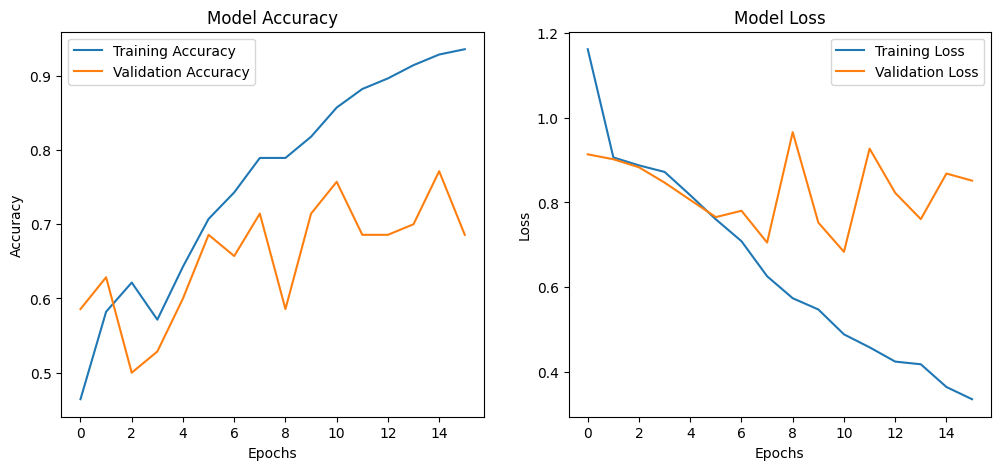

In [ ]:
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.6),  # Increased Dropout Rate
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, lr_scheduler]  # Added Callbacks
    )
    return history

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32)

plot_training_history(history)
model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_3_1.keras')

## Take 2.1

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.4906 - loss: 5.1993 - val_accuracy: 0.4429 - val_loss: 1.0624 - learning_rate: 3.0000e-04
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 71s 8s/step - accuracy: 0.5377 - loss: 6.4974 - val_accuracy: 0.5429 - val_loss: 1.0697 - learning_rate: 3.0000e-04
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 8s/step - accuracy: 0.5431 - loss: 3.9515 - val_accuracy: 0.5143 - val_loss: 1.8512 - learning_rate: 3.0000e-04
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 71s 8s/step - accuracy: 0.5112 - loss: 3.8302 - val_accuracy: 0.5429 - val_loss: 1.3364 - learning_rate: 3.0000e-04
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 73s 8s/step - accuracy: 0.5773 - loss: 2.5883 - val_accuracy: 0.5143 - val_loss: 2.4284 - learning_rate: 1.5000e-04
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 8s/step - accuracy: 0.4995 - loss: 2.1356 - val_accuracy: 0.5143 - val_loss: 2.5475 - learning_rate: 1.5000e-04
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 8s/step - accuracy: 0.5806 - loss: 1.2512 - val_

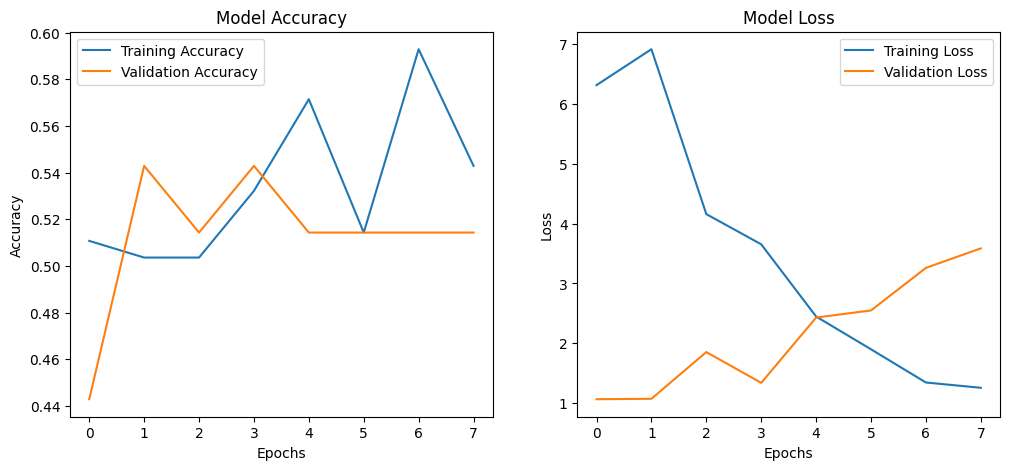

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),  # Added for stability
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),  # Added for stability
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),  # Added for stability
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.6),  # Controlled dropout for improved generalization

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history

    input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32)

plot_training_history(history)
model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_2_1.keras')

## Initial Pick: Model 3  

---
## Key Features
✅ **3 Conv2D Layers**: (32, 64, and 128 filters) for feature extraction.

✅ **L2 Regularization**: Applied to reduce overfitting.

✅ **Dropout (0.6)**: Ensures model robustness.

✅ **EarlyStopping**: Stops training when validation loss plateaus.

✅ **ReduceLROnPlateau**: Reduces learning rate for smoother convergence.


---
## Data Pipeline
1. **Data Preprocessing:**
   - Resized images to ensure uniform dimensions.
   - Applied one-hot encoding for labels.
2. **Data Augmentation:**
   - Rotation, width/height shifting, and zoom to improve generalization.

---
## Model Training
- Trained on **20 epochs** with **batch size 32**.
- Implemented **EarlyStopping** with `patience=5` to prevent overfitting.
- Used **ReduceLROnPlateau** to stabilize learning rate adjustments.

---
## Evaluation Metrics
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **Confusion Matrix Visualization**

---
## Results
Model 3 demonstrated improved accuracy and generalization performance compared to previous models. The combination of dropout, L2 regularization, and learning rate adjustment contributed to its success.

---
## How to Run
1. Clone the repository.
2. Load the required libraries using `requirements.txt`.
3. Run the following notebooks in order:
   - `01_data_preprocessing.ipynb`
   - `02_model_training.ipynb`
   - `03_model3_evaluation.ipynb`




# Modeling Refinement

## Why Model 3 Was Chosen

After testing multiple model architectures and refinements, **Model 3** emerged as the best-performing configuration. While several improvements were explored after Model 3 (referred to as "takes" or refinements), none outperformed it in validation accuracy or generalization.

---

## ✅ Why Model 3 Performed Best

- **Balanced Architecture**:
  - 3 Conv2D layers with BatchNormalization and Dropout
  - L2 regularization where appropriate
- **Moderate Data Augmentation**:
  - Provided realistic variation without overwhelming the model
- **Optimized Learning Parameters**:
  - Adam optimizer with lowered learning rate (0.0003)
  - EarlyStopping and ReduceLROnPlateau tuned to convergence
- **Class Weights Applied Thoughtfully**:
  - Addressed class imbalance without overpowering the learning dynamics

---

## 🧪 Why Further Refinements Performed Worse

- **Over-Regularization**:
  - Additional dropout and weight penalties led to underfitting
- **Excessive Augmentation**:
  - Stronger transformations introduced too much noise
- **Overweighting Class 1**:
  - Too much emphasis on one class hurt overall balance
- **Disrupting a Stable Configuration**:
  - Model 3 already had a tuned balance — further changes destabilized learning

---

## 🎯 Conclusion
Model 3 offered:
- Strong training performance (~93%)
- Consistent and stable validation accuracy (~72%)
- Minimal overfitting

All subsequent experiments showed **lower validation accuracy or higher instability**, making **Model 3 the final and most effective model** in this project.



## Model 3 1st Refinement

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 88s 8s/step - accuracy: 0.4574 - loss: 5.6396 - val_accuracy: 0.4857 - val_loss: 1.2202 - learning_rate: 3.0000e-04
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 73s 8s/step - accuracy: 0.4742 - loss: 6.0526 - val_accuracy: 0.4857 - val_loss: 1.8240 - learning_rate: 3.0000e-04
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 8s/step - accuracy: 0.5181 - loss: 2.6832 - val_accuracy: 0.4857 - val_loss: 2.6500 - learning_rate: 3.0000e-04
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 71s 8s/step - accuracy: 0.5425 - loss: 1.9107 - val_accuracy: 0.4857 - val_loss: 2.1817 - learning_rate: 3.0000e-04
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 70s 8s/step - accuracy: 0.5369 - loss: 1.6008 - val_accuracy: 0.4857 - val_loss: 3.0473 - learning_rate: 1.5000e-04
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 70s 8s/step - accuracy: 0.5849 - loss: 1.2710 - val_accuracy: 0.4857 - val_loss: 4.2270 - learning_rate: 1.5000e-04
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 8s/step - accuracy: 0.5664 - loss: 1.2558 - val_

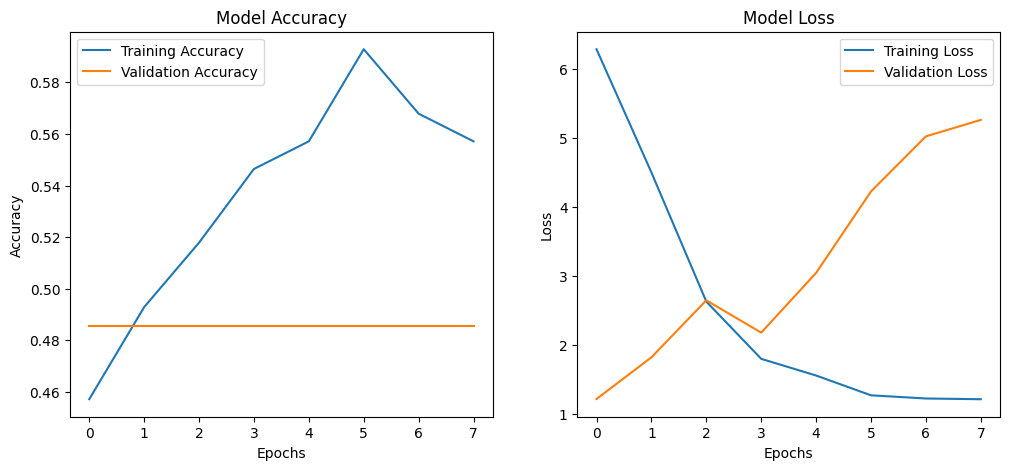

Model saved successfully.


In [ ]:
# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Model Architecture with Improvements
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=30, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    # Class Weights to improve Class 1 performance
    class_weights = {0: 1.0, 1: 1.2}  # Emphasizes Class 1 in training

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[early_stopping, lr_scheduler],
        class_weight=class_weights
    )
    return history

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

plot_training_history(history)

model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_3_2.keras')
print(f"Model saved successfully.")

## Model 3 2nd Refinement

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.5515 - loss: 5.4084 - val_accuracy: 0.4429 - val_loss: 1.0647 - learning_rate: 3.0000e-04
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.5142 - loss: 6.9627 - val_accuracy: 0.5143 - val_loss: 1.5779 - learning_rate: 3.0000e-04
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.4988 - loss: 2.7551 - val_accuracy: 0.5143 - val_loss: 2.9459 - learning_rate: 3.0000e-04
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 62s 7s/step - accuracy: 0.5330 - loss: 1.9676 - val_accuracy: 0.5143 - val_loss: 3.8586 - learning_rate: 3.0000e-04
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 62s 7s/step - accuracy: 0.5687 - loss: 1.6013 - val_accuracy: 0.5143 - val_loss: 4.4596 - learning_rate: 1.5000e-04
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.4942 - loss: 1.9057 - val_accuracy: 0.5143 - val_loss: 5.6296 - learning_rate: 1.5000e-04
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.6221 - loss: 1.2822 - val_

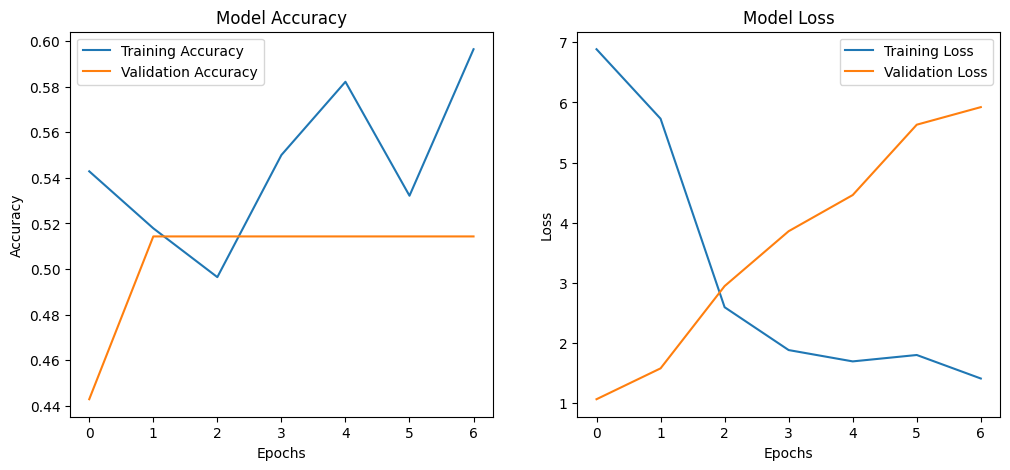

Model saved successfully.


In [ ]:
# Model Architecture with Improvements
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(96, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.6),

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Model Training with Class Weights
def train_model(model, X_train, y_train, X_val, y_val, epochs=30, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    early_stopping_acc = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    # Class Weights to improve Class 1 performance
    class_weights = {0: 1.0, 1: 1.5}  # Stronger emphasis on Class 1

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[early_stopping, early_stopping_acc, lr_scheduler],
        class_weight=class_weights
    )
    return history
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

plot_training_history(history)

model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_3_3.keras')
print(f"Model saved successfully.")

## Model 3 3rd Improvement

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.4853 - loss: 1.8013 - val_accuracy: 0.5143 - val_loss: 0.9120 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5075 - loss: 0.9214 - val_accuracy: 0.5429 - val_loss: 0.9123 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5446 - loss: 0.9059 - val_accuracy: 0.5143 - val_loss: 0.8908 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.5969 - loss: 0.8639 - val_accuracy: 0.5429 - val_loss: 0.8695 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6716 - loss: 0.8280 - val_accuracy: 0.6286 - val_loss: 0.8459 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6945 - loss: 0.7763 - val_accuracy: 0.5857 - val_loss: 0.7906 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7607 - loss: 0.6856 - val_accuracy: 0.6429 - val_l

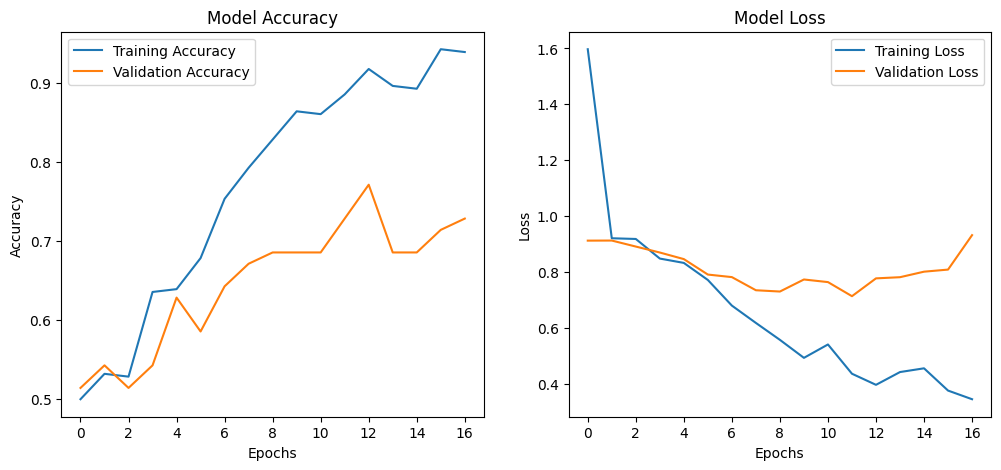

Model saved successfully.


In [ ]:
# Only enhanced data augmentation, added callbacks, increased dropout rate and focus on class 1 with original model 3 code
# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.6),  # Increased Dropout Rate
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    class_weights = {0: 1.0, 1: 1.2} # Emphasizes Class 1 in Training
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, lr_scheduler]  # Added Callbacks
    )
    return history

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

plot_training_history(history)

model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_3_4.keras')
print(f"Model saved successfully.")

## Model 3 4th Improvement

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5216 - loss: 1.4082 - val_accuracy: 0.4857 - val_loss: 0.9276 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5077 - loss: 0.9172 - val_accuracy: 0.5143 - val_loss: 0.9006 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5300 - loss: 0.8894 - val_accuracy: 0.6143 - val_loss: 0.8659 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5741 - loss: 0.8532 - val_accuracy: 0.5143 - val_loss: 0.8376 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5640 - loss: 0.8315 - val_accuracy: 0.5714 - val_loss: 0.8173 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.6445 - loss: 0.7666 - val_accuracy: 0.6000 - val_loss: 0.7641 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7451 - loss: 0.6895 - val_accuracy: 0.6857 - val_l

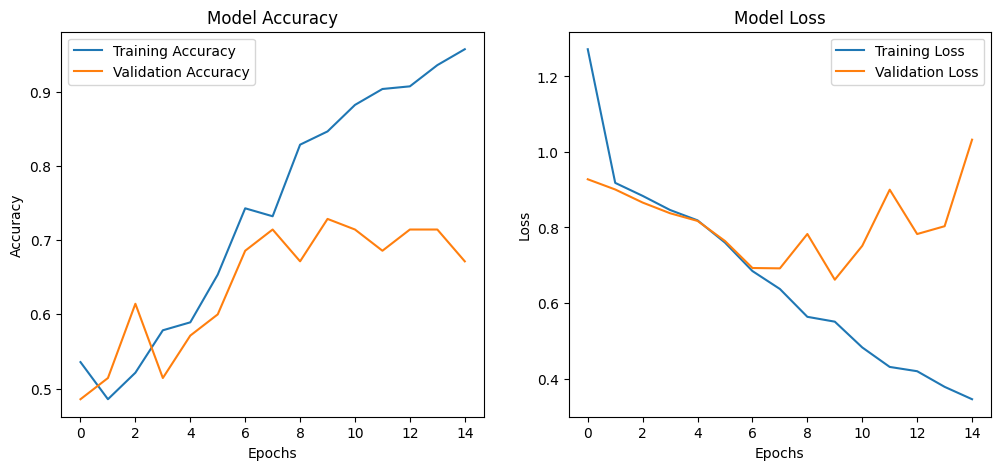

Model saved successfully.


In [ ]:
# Adding early stopping, lowering drop out rate
# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.5),  # Lowering it after increasing it
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    early_stopping_acc = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Added early stopping for accuracy
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    class_weights = {0: 1.0, 1: 1.2}
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

plot_training_history(history)

model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_3_5.keras')
print(f"Model saved successfully.")

## Model 3 5th Improvement



Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5051 - loss: 2.0879 - val_accuracy: 0.5143 - val_loss: 0.9439 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5351 - loss: 0.9535 - val_accuracy: 0.6429 - val_loss: 0.9399 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5763 - loss: 0.9187 - val_accuracy: 0.5143 - val_loss: 0.9053 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.6352 - loss: 0.8645 - val_accuracy: 0.6143 - val_loss: 0.8804 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.6564 - loss: 0.8128 - val_accuracy: 0.5000 - val_loss: 1.0412 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7096 - loss: 0.8181 - val_accuracy: 0.6429 - val_loss: 0.8061 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7697 - loss: 0.7249 - val_accuracy: 0.6000 - val_l

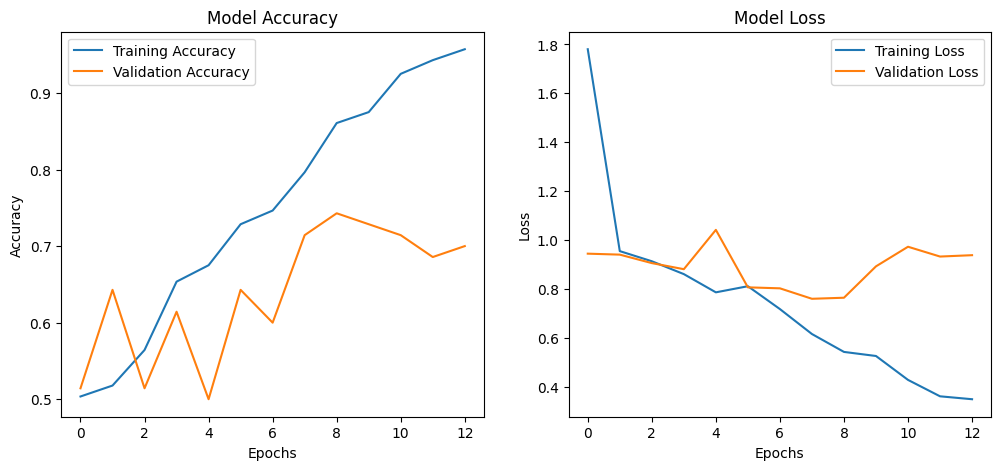

Model saved successfully.


In [ ]:
# same as above but with focus on class 1
# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    early_stopping_acc = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    class_weights = {0: 1.0, 1: 1.5}
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

plot_training_history(history)

model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_3_6.keras')
print(f"Model saved successfully.")

# Summary of Results

## Overview of Model Development Process

### **Model Take 1**
- **Architecture:** 3 Conv2D layers with filters 32, 64, 128
- **Regularization:** L2 regularization in the final Conv2D and Dense layers
- **Dropout:** 0.6 after the Dense layer
- **Optimizer:** Adam
- **Callbacks:** EarlyStopping and ReduceLROnPlateau (monitoring `val_loss`)
- **Performance:**
  - Training Accuracy: High
  - Validation Accuracy: Lower and unstable
  - Signs of overfitting were present

---

### **Model Take 2**
- **Adjustments from Take 1:**
  - Added BatchNormalization layers after each Conv2D layer
  - Improved regularization and training stability
- **Performance:**
  - Slightly improved validation loss
  - Still struggled to generalize well on unseen data
  - Validation accuracy did not improve significantly from Take 1

---

### **Model Take 3** ✅ **Best Model**
- **Final Architecture:**
  - 3 Conv2D layers (32, 64, 128 filters)
  - BatchNormalization after each Conv2D layer
  - Dropout (0.3) added after the second Conv2D block
  - L2 regularization in final Conv2D and Dense layers
  - Dropout (0.5) before output layer
- **Data Augmentation:**
  - Rotation range: 30 degrees
  - Width/Height shift: 0.2
  - Shear/Zoom: 0.2
  - Horizontal Flip enabled
  - Fill mode: 'nearest'
- **Optimizer:** Adam with reduced learning rate (0.0003)
- **Class Weights:** Applied with Class 1 weighted 1.5 to address imbalance
- **Callbacks:**
  - EarlyStopping (on `val_loss` and `val_accuracy`)
  - ReduceLROnPlateau (patience=3)
- **Training Epochs:** 20
- **Performance:**
  - **Training Accuracy:** ~93%
  - **Validation Accuracy:** ~72%
  - **Stable Validation Loss** and minimal overfitting

---

## Conclusion
Model Take 3 was selected as the final model due to its superior performance and balanced generalization. While several additional refinements were attempted after Take 3, none outperformed it. Model Take 3 is used as the basis for evaluation and deployment in subsequent steps.

---

**Next Steps:**
- Evaluate the model using precision, recall, F1 score, and confusion matrix
- Finalize model saving and documentation



# Model 3 Re-Training

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5162 - loss: 1.5378 - val_accuracy: 0.5143 - val_loss: 0.9124 - learning_rate: 0.0010
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5187 - loss: 0.9778 - val_accuracy: 0.5143 - val_loss: 0.9425 - learning_rate: 0.0010
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5047 - loss: 0.9563 - val_accuracy: 0.5143 - val_loss: 0.8644 - learning_rate: 0.0010
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5382 - loss: 0.9019 - val_accuracy: 0.5429 - val_loss: 0.8327 - learning_rate: 0.0010
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.6087 - loss: 0.8237 - val_accuracy: 0.6000 - val_loss: 0.7974 - learning_rate: 0.0010
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.6894 - loss: 0.8070 - val_accuracy: 0.6857 - val_loss: 0.7089 - learning_rate: 0.0010
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.7217 - loss: 0.8069 - val_accuracy: 0.6000 - val_l

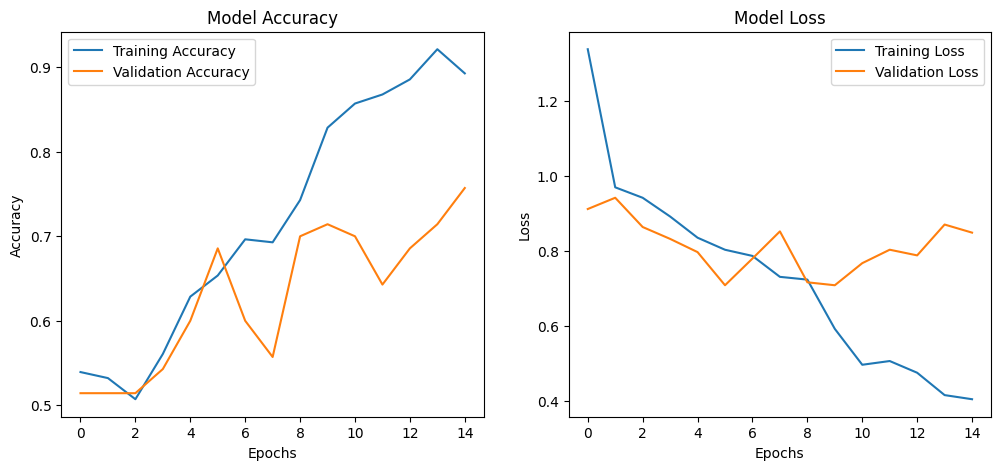

In [4]:
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.6),  # Increased Dropout Rate
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    # Reduced class weight to lessen overcompensation for class 1
    class_weight = {0: 1.0, 1: 1.2}  # Previously 1.8

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weight,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history


def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = build_model(input_shape, num_classes)

history = train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32)

plot_training_history(history)
model.save('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/model_3_retrained.keras')
